En redes neuronales, el objetivo principal es minimizar una función de pérdida, que mide qué tan lejos está el modelo de realizar predicciones correctas. El algoritmo más común para hacer esto es el Gradiente Descendente (Gradient Descent), que ajusta los parámetros del modelo en la dirección que reduce la pérdida.

### Tipos de Gradiente Descendente:


Batch Gradient Descent:


Usa todo el conjunto de datos para calcular el gradiente. Aunque es preciso, es lento porque requiere evaluar todos los ejemplos antes de cada actualización.


Stochastic Gradient Descent (SGD):


Actualiza los parámetros usando un solo ejemplo por vez. Es rápido y puede escapar de mínimos locales, pero introduce mucha varianza, lo que puede dificultar la convergencia.


Mini-Batch Gradient Descent:


Un equilibrio entre los dos anteriores. Usa un pequeño lote de ejemplos para cada actualización. Esto permite cierto nivel de precisión y es más eficiente que usar todos los datos.



##¿Qué es la optimización en redes neuronales?

La optimización es el proceso de ajustar los parámetros de un modelo para minimizar una función de pérdida. En el contexto de redes neuronales, el objetivo es encontrar los valores de los pesos y biases que minimizan la diferencia entre las predicciones del modelo y los valores reales.


###Algoritmos de Optimización:

SGD (Stochastic Gradient Descent):

Actualiza los pesos directamente con el gradiente de la pérdida.
Sensible al tamaño del learning rate y puede tener problemas para encontrar el mínimo global.

Algoritmos de Optimización Avanzados:
SGD con Momentum: Introduce un término de "inercia" que acumula gradientes anteriores para suavizar las actualizaciones. Ayuda a evitar quedarse atascado en mínimos locales y acelera la convergencia.

Fórmula:


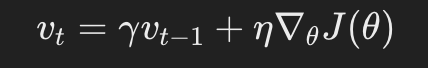

donde
𝑣
𝑡
  es la velocidad o momentum y
𝛾
 es el coeficiente de momentum (generalmente 0.9).

------------------------

RMSprop: Adapta el learning rate para cada parámetro dividiendo el learning rate por una media móvil de los gradientes cuadrados. Esto ayuda cuando los gradientes tienen magnitudes muy diferentes.

Fórmula:

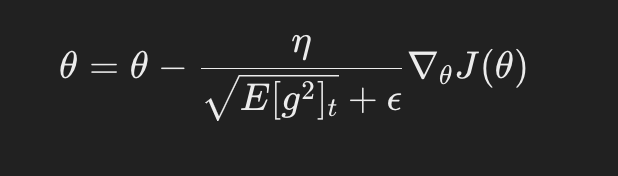



donde
𝐸
[
𝑔
2
]
𝑡
E[g
2
 ]
t
​
  es la media móvil de los cuadrados de los gradientes y
𝜖
ϵ es un pequeño valor para evitar divisiones por cero.

---------------

Adam (Adaptive Moment Estimation): Combina las ideas de Momentum y RMSprop. Mantiene tanto una media móvil de los gradientes como de los cuadrados de los gradientes, ajustando el learning rate de manera adaptativa.

Fórmula:

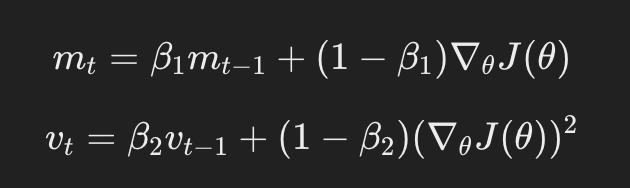


donde
𝑚
𝑡
  es la media móvil del gradiente y
𝑣
𝑡
 es la media móvil de los cuadrados de los gradientes.
𝛽
1
  y
𝛽
2
  son hiperparámetros típicamente cercanos a 1.

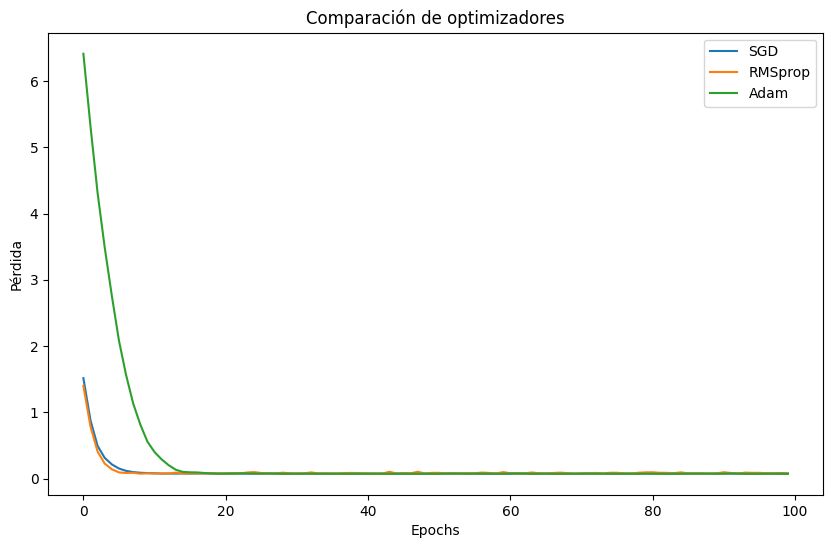

In [7]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Generamos datos sintéticos
np.random.seed(42)
X = np.linspace(-1, 1, 100)
y = 3 * X + np.random.randn(*X.shape) * 0.3  # y = 3x + ruido

# Convertimos los datos en tensores de TensorFlow
X_train = tf.constant(X.reshape(-1, 1), dtype=tf.float32)
y_train = tf.constant(y.reshape(-1, 1), dtype=tf.float32)

# Definimos un modelo simple de regresión lineal
model = tf.keras.Sequential([tf.keras.layers.Dense(1, input_shape=(1,))])

# Función de pérdida y compilación del modelo
loss_fn = tf.keras.losses.MeanSquaredError()

# Definimos diferentes optimizadores
optimizers = {
    'SGD': tf.keras.optimizers.SGD(learning_rate=0.1),
    'RMSprop': tf.keras.optimizers.RMSprop(learning_rate=0.1),
    'Adam': tf.keras.optimizers.Adam(learning_rate=0.1)
}

# Guardamos el historial de pérdidas para cada optimizador
loss_history = {key: [] for key in optimizers.keys()}

# Entrenamos el modelo con cada optimizador
epochs = 100
for name, optimizer in optimizers.items():
    # Re-inicializamos el modelo para cada optimización
    model = tf.keras.Sequential([tf.keras.layers.Dense(1, input_shape=(1,))])
    model.compile(optimizer=optimizer, loss=loss_fn)

    # Entrenamos el modelo
    history = model.fit(X_train, y_train, epochs=epochs, verbose=0)

    # Guardamos el historial de pérdidas
    loss_history[name] = history.history['loss']

# Graficamos las pérdidas
plt.figure(figsize=(10, 6))
for name, loss in loss_history.items():
    plt.plot(loss, label=name)
plt.title('Comparación de optimizadores')
plt.xlabel('Epochs')
plt.ylabel('Pérdida')
plt.legend()
plt.show()


##¿Qué son los Regularizadores?

Los regularizadores son técnicas utilizadas para penalizar o restringir la complejidad de un modelo durante el entrenamiento. Su principal objetivo es evitar que el modelo se ajuste demasiado a los datos de entrenamiento, es decir, que sufra overfitting. El overfitting ocurre cuando el modelo se ajusta muy bien a los datos de entrenamiento pero no generaliza bien a datos nuevos.

##Regularización en la Función de Costo

La regularización se introduce en la función de costo o pérdida del modelo agregando un término que penaliza los parámetros del modelo si estos son demasiado grandes o están fuera de ciertos límites. La nueva función de pérdida sería:

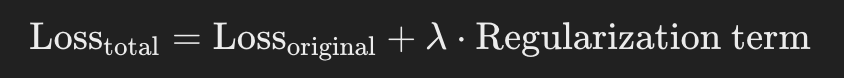

##Tipos de Regularización

####1. Regularización L1 (Lasso)
La regularización L1 agrega la suma de los valores absolutos de los coeficientes de los pesos en la función de pérdida. Penaliza a los parámetros más grandes al forzar algunos de ellos a acercarse a cero, lo que conduce a modelos más sencillos y parciales.

Regularization term (L1)
=
∑
𝑖
∣
𝜃
𝑖
∣

Ventajas: Tiende a generar pesos escasos, lo que significa que algunos de ellos se vuelven exactamente cero, promoviendo la simplicidad y ayudando con la selección de características.

Aplicación: Útil cuando quieres que el modelo sea más simple y que algunos parámetros se vuelvan irrelevantes (por ejemplo, en problemas de alta dimensionalidad).

-----------

####2. Regularización L2 (Ridge)
La regularización L2 agrega la suma de los cuadrados de los coeficientes de los pesos en la función de pérdida. Penaliza los pesos grandes, pero no los fuerza a ser cero.

Regularization term (L2)
=
∑
𝜃
𝑖
2


Ventajas: Mantiene todos los parámetros del modelo, pero los hace más pequeños, lo que ayuda a suavizar las predicciones y mejora la generalización.

Aplicación: Es más adecuado cuando quieres que todos los parámetros se mantengan en el modelo, pero sin que tengan valores grandes.



####3. Elastic Net
Elastic Net combina la regularización L1 y L2. Esto es útil cuando quieres beneficiarte tanto de la simplicidad de L1 (haciendo que algunos pesos sean cero) como de la estabilidad de L2 (evitando que algunos parámetros crezcan mucho).

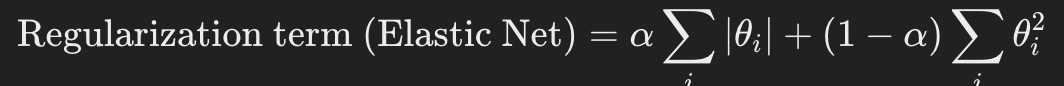


Donde
𝛼
es un parámetro que ajusta la proporción entre L1 y L2.

####4. Dropout
Dropout es una técnica diferente de regularización que no penaliza directamente los parámetros. En su lugar, durante el entrenamiento, desactiva (pone en 0) aleatoriamente un porcentaje de las neuronas en cada capa en cada paso de entrenamiento.

Durante el entrenamiento, algunas neuronas "se apagan" aleatoriamente en cada forward pass, lo que evita que ciertas neuronas dependan demasiado unas de otras.

Durante la inferencia, todas las neuronas están activas, pero sus pesos se escalan para compensar el efecto del dropout.
El porcentaje de dropout (típicamente entre 20-50%) es un hiperparámetro que se puede ajustar.

Ventajas: Ayuda a que el modelo no dependa en exceso de ciertas combinaciones de características y mejora la generalización.
Aplicación: Dropout es muy común en redes neuronales profundas, especialmente en capas densas y convolucionales.


####5. Early Stopping
Early Stopping es una forma de regularización que no implica modificar la función de pérdida. Se detiene el entrenamiento cuando el modelo comienza a sobreajustarse a los datos de entrenamiento.

Cómo funciona: Se supervisa el rendimiento del modelo en un conjunto de validación. Si la pérdida de validación empieza a aumentar mientras la pérdida de entrenamiento sigue disminuyendo, se detiene el entrenamiento, asumiendo que el modelo ha comenzado a sobreajustarse.

Ventajas: Es una forma sencilla de regularización que no requiere modificar el modelo ni la función de pérdida.


In [1]:
import torch
import torch.nn as nn
import torch.optim as optim

# Generamos datos sintéticos
X = torch.randn(100, 1)  # 100 muestras, 1 característica
y = 3 * X + 0.1 * torch.randn(100, 1)  # y = 3X + ruido

# Definimos un modelo simple con regularización L2 y Dropout
class RegularizedNN(nn.Module):
    def __init__(self):
        super(RegularizedNN, self).__init__()
        self.layer1 = nn.Linear(1, 64)
        self.dropout = nn.Dropout(0.5)  # Dropout con 50% de neuronas apagadas
        self.layer2 = nn.Linear(64, 1)

    def forward(self, x):
        x = torch.relu(self.layer1(x))
        x = self.dropout(x)  # Aplicamos dropout en la capa oculta
        x = self.layer2(x)
        return x

# Inicializamos el modelo
model = RegularizedNN()

# Usamos MSELoss para regresión y Adam con regularización L2
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01, weight_decay=0.01)  # weight_decay es la regularización L2

# Entrenamiento del modelo
for epoch in range(1000):
    model.train()
    optimizer.zero_grad()  # Limpiamos los gradientes
    outputs = model(X)  # Hacemos predicciones
    loss = criterion(outputs, y)  # Calculamos la pérdida
    loss.backward()  # Calculamos los gradientes
    optimizer.step()  # Actualizamos los parámetros

    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/1000], Loss: {loss.item():.4f}')


Epoch [100/1000], Loss: 0.3592
Epoch [200/1000], Loss: 0.2099
Epoch [300/1000], Loss: 0.2063
Epoch [400/1000], Loss: 0.1966
Epoch [500/1000], Loss: 0.2045
Epoch [600/1000], Loss: 0.2360
Epoch [700/1000], Loss: 0.1568
Epoch [800/1000], Loss: 0.2648
Epoch [900/1000], Loss: 0.1830
Epoch [1000/1000], Loss: 0.1550


Dropout: Se aplica después de la primera capa, con un 50% de neuronas desactivadas en cada paso de entrenamiento.

Regularización L2 (weight decay): Se aplica directamente en el optimizador Adam usando el parámetro weight_decay=0.01.

In [2]:
###Aplicar la regularizacion L1 con SGD en la misma red neuronal